In [93]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.io import loadmat
def correct_channel(input, save_file, channel_map_location):
    map_location = channel_map_location
    channel_map = loadmat(map_location)
    all_channel = [ch[0] for ch in channel_map['Channel'][0][0][0][0]] # ['C29', 'C39', 'C18', 'C28', 'C30', 'C31', 'C41', 'C20', 'C43', 'C32', 'C44', 'C45', 'C34', 'C46', 'C47', 'C36', 'C48', 'C49', 'C38', 'C40', 'C50', 'C51', 'C42', 'C52', 'C1', 'C11', 'C2', 'C3', 'C13', 'C4', 'C5', 'C15', 'C6', 'C7', 'C17', 'C19', 'C8', 'C9', 'C21', 'C10', 'C12', 'C33', 'C22', 'C23', 'C35', 'C14', 'C24', 'C25', 'C37', 'C16', 'C26', 'C27']
    correct_location = [all_channel.index('C'+str(i)) for i in range(1, 53)] # [index_of_'C1', index_of_'C2', index_of_'C3', ...]
    assert len(input.shape) == 4 
    assert input.shape[1] == 52
    res = input[:,correct_location,:,:]
    np.save(save_file, res)
    return res 

label -> (185, 1)
label -> (185, 1)
label -> (185, 1)
Validating the reuslt!


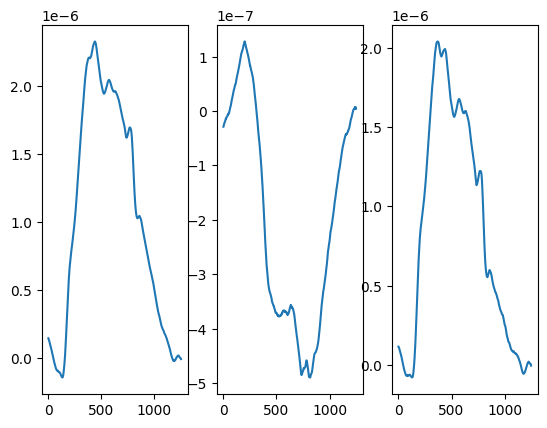

In [94]:
# read zhifei's data

output_diagnosis_fold = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/allData/zf_prognosis/prep_diagnosis'
output_prognosis_fold = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/allData/zf_prognosis/prep_prognosis'

ch_config_path = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/allData/zf_prognosis/Channel_Configuration.mat'
hbo_path = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/allData/zf_prognosis/All 52-channel/all52CH_prep_HbO.mat'
hb_type_array = ['HbO', 'HbR', 'HbT']


hb_data = loadmat(hbo_path)['data_hb']
label = np.array(loadmat(hbo_path)['label'])
hb_data = np.empty((hb_data.shape[0], hb_data.shape[1], hb_data.shape[2], 3))

for i, hb_type in enumerate(hb_type_array):

    hb_path = hbo_path.replace('HbO', hb_type)
    hb = loadmat(hb_path)['data_hb']
    hb_data[..., i] = hb
    label = np.array(loadmat(hb_path)['label'])
    
    # validate if the value and shape of label in HbO, HbR, HbT are the same
    print(f'label -> {label.shape}')
    
    

print("Validating the reuslt!")
fig, axs = plt.subplots(1,3)
axs[0].plot(np.mean(hb_data[...,0], axis=(0,1)))
axs[1].plot(np.mean(hb_data[...,1], axis=(0,1)))
axs[2].plot(np.mean(hb_data[...,2], axis=(0,1)))




# label = np.array(loadmat(hbo_path)['label'])
# # print([i for i in hbo])

# print(label.shape)


# HCS_MDD_subjects_label = label[]
# print(HCS_MDD_subjects.shape)


# read the prep data from zhifei and apply correct channel function to it. 

In [120]:
data = loadmat(hb_path)
print([i for i in data])
sub_name = [data['subject_name'][0,:][i][0] for i in range(data['subject_name'].shape[-1])]
label = data['label'][:,0]
print(sub_name)
print(label)

for i in range(150):
    print(f"i: {1+i}, sub_name: {sub_name[i]}, label: {label[i]}")

['__header__', '__version__', '__globals__', 'data_hb', 'label', 'subject_name', 'channel_flag', 'subject_type']
['CT001', 'CT002', 'CT003', 'CT004', 'CT005', 'CT006', 'CT007', 'CT008', 'CT009', 'CT010', 'CT011', 'CT012', 'CT013', 'CT014', 'CT016', 'CT017', 'CT018', 'CT019', 'CT020', 'CT021', 'CT022', 'CT023', 'CT024', 'CT025', 'CT026', 'CT027', 'CT028', 'CT029', 'CT030', 'CT031', 'CT032', 'CT033', 'CT034', 'CT035', 'CT036', 'CT037', 'CT038', 'CT039', 'CT040', 'CT041', 'CT042', 'CT043', 'CT044', 'CT045', 'CT046', 'CT047', 'CT048', 'CT049', 'CT050', 'CT051', 'CT052', 'CT054', 'CT055', 'CT056', 'CT057', 'CT058', 'CT059', 'CT060', 'CT061', 'CT062', 'CT063', 'CT064', 'CT065', 'CT066', 'CT067', 'CT069', 'CT070', 'CT071', 'CT072', 'CT073', 'CT074', 'PT001', 'PT002', 'PT003', 'PT004', 'PT005', 'PT006', 'PT008', 'PT009', 'PT010', 'PT011', 'PT012', 'PT013', 'PT014', 'PT015', 'PT016', 'PT017', 'PT018', 'PT019', 'PT020', 'PT021', 'PT022', 'PT023', 'PT024', 'PT025', 'PT026', 'PT027', 'PT028', 'PT0

In [92]:

diagnosis_index = np.logical_or(label == 0, label == 1)[:,0]
diagnosis_data = hb_data[diagnosis_index]
diagnosis_label = label[diagnosis_index][:,0]

correct_channel_diagnosis_data = correct_channel(diagnosis_data, output_diagnosis_fold + '/hb_data', ch_config_path)
print('correct_channel_diagnosis_data -> ', correct_channel_diagnosis_data.shape)
np.save(output_diagnosis_fold + '/label', diagnosis_label)
print(diagnosis_label.shape)

correct_channel_diagnosis_data ->  (141, 52, 1251, 3)
(141,)


Validating the reuslt!
(141, 52, 125, 3)


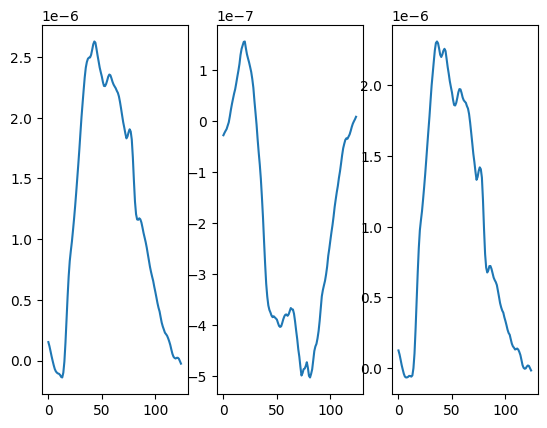

In [91]:
avg_correct_channel_diagnosis_data = correct_channel_diagnosis_data.copy()[...,:1250,:]
avg_correct_channel_diagnosis_data = np.reshape(avg_correct_channel_diagnosis_data, (141,52,125,-1,3))
avg_correct_channel_diagnosis_data = np.mean(avg_correct_channel_diagnosis_data, axis=3)

print("Validating the reuslt!")
fig, axs = plt.subplots(1,3)
axs[0].plot(np.mean(avg_correct_channel_diagnosis_data[...,0], axis=(0,1)))
axs[1].plot(np.mean(avg_correct_channel_diagnosis_data[...,1], axis=(0,1)))
axs[2].plot(np.mean(avg_correct_channel_diagnosis_data[...,2], axis=(0,1)))
print(avg_correct_channel_diagnosis_data.shape)

np.save(output_diagnosis_fold + '/avg_hb_data', avg_correct_channel_diagnosis_data)

Validating the reuslt!


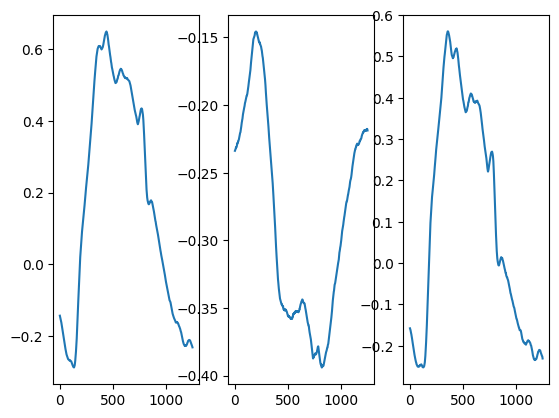

In [88]:
nor_diagnosis_data = correct_channel_diagnosis_data.copy()

for i in range(nor_diagnosis_data.shape[0]):
   data = nor_diagnosis_data[i]
   nor_diagnosis_data[i] = (data - np.mean(data)) / np.std(data)

print("Validating the reuslt!")
fig, axs = plt.subplots(1,3)
axs[0].plot(np.mean(nor_diagnosis_data[...,0], axis=(0,1)))
axs[1].plot(np.mean(nor_diagnosis_data[...,1], axis=(0,1)))
axs[2].plot(np.mean(nor_diagnosis_data[...,2], axis=(0,1)))

np.save(output_diagnosis_fold + '/nor_hb_data', nor_diagnosis_data)

Validating the reuslt!


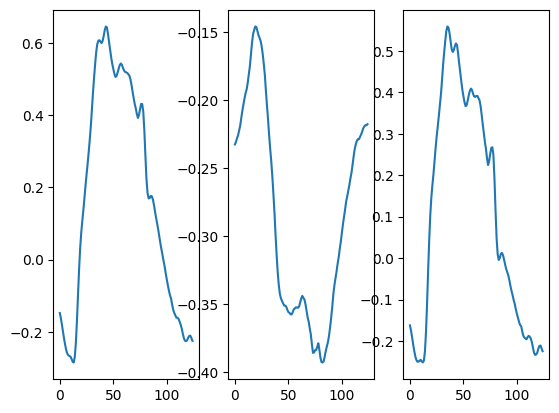

In [79]:
avg_nor_diagnosis_data = nor_diagnosis_data.copy()[...,:1250,:]
avg_nor_diagnosis_data = np.reshape(avg_nor_diagnosis_data, (141,52,125,-1,3))
avg_nor_diagnosis_data = np.mean(avg_nor_diagnosis_data, axis=3)

print("Validating the reuslt!")
fig, axs = plt.subplots(1,3)
axs[0].plot(np.mean(avg_nor_diagnosis_data[...,0], axis=(0,1)))
axs[1].plot(np.mean(avg_nor_diagnosis_data[...,1], axis=(0,1)))
axs[2].plot(np.mean(avg_nor_diagnosis_data[...,2], axis=(0,1)))
np.save(output_diagnosis_fold + '/avg_nor_hb_data', nor_diagnosis_data)